In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data importation
original_path = '/home/kai/Documents/Install/pypownet/pypownet/parameters/default14/'#'/home/arthur_dent/BalthazarDonon/pypownet/parameters/default14/'#easy/chronics/'
loads_p_file = '_N_loads_p.csv'
prods_p_file = '_N_prods_p.csv'
datetimes_file = '_N_datetimes.csv'
maintenance_file = 'maintenance.csv'
hazards_file = 'hazards.csv'
imaps_file = '_N_imaps.csv'
df_loads_p = {}
df_prods_p = {}
df_datetimes = {}
df_maintenance = {}
df_hazards = {}
for mode in ['easy', 'medium', 'hard']:
    for i in range(10):
        path = original_path+mode+'/chronics/'+str(i)+'/'
        df_loads_p[mode+str(i)] = pd.read_csv(path+loads_p_file, sep=';')
        df_prods_p[mode+str(i)] = pd.read_csv(path+prods_p_file, sep=';')
        df_datetimes[mode+str(i)] = pd.read_csv(path+datetimes_file, sep=';')
        df_loads_p[mode+str(i)].index = pd.to_datetime(df_datetimes[mode+str(i)]['date'] + ' ' + df_datetimes[mode+str(i)]['time'])
        df_prods_p[mode+str(i)].index = pd.to_datetime(df_datetimes[mode+str(i)]['date'] + ' ' + df_datetimes[mode+str(i)]['time'])
        df_maintenance[mode+str(i)] = pd.read_csv(path+maintenance_file, sep =';')
        df_maintenance[mode+str(i)].index = pd.to_datetime(df_datetimes[mode +str(i)]['date'] + ' ' + df_datetimes[mode+str(i)]['time'])
        df_hazards[mode+str(i)] = pd.read_csv(path+hazards_file, sep=';')
        df_hazards[mode+str(i)].index = pd.to_datetime(df_datetimes[mode+str(i)]['date'] + ' ' + df_datetimes[mode+str(i)]['time'])
        

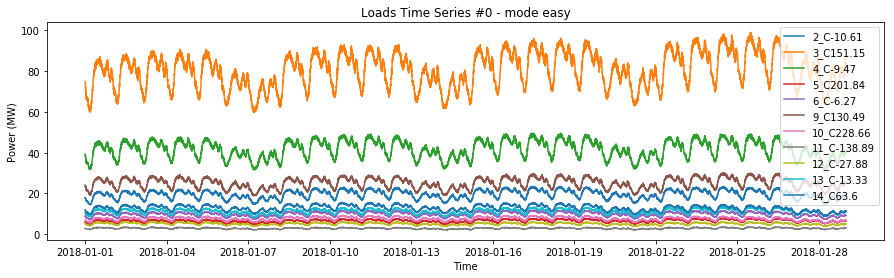

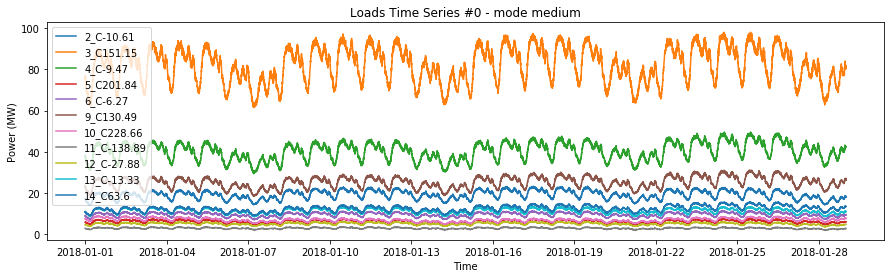

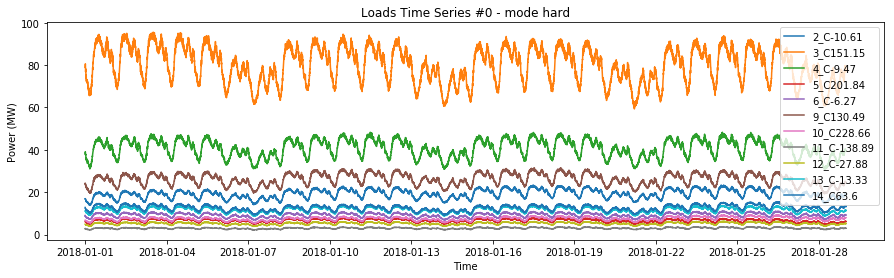

In [3]:
for mode in ['easy', 'medium', 'hard']:
    plt.figure(figsize=[15,4])
    plt.title('Loads Time Series #'+str(0)+' - mode '+mode)
    plt.xlabel('Time')
    plt.ylabel('Power (MW)')
    plt.plot(df_loads_p[mode+str(0)])
    plt.legend(list(df_loads_p[mode+str(0)]))
    plt.show()

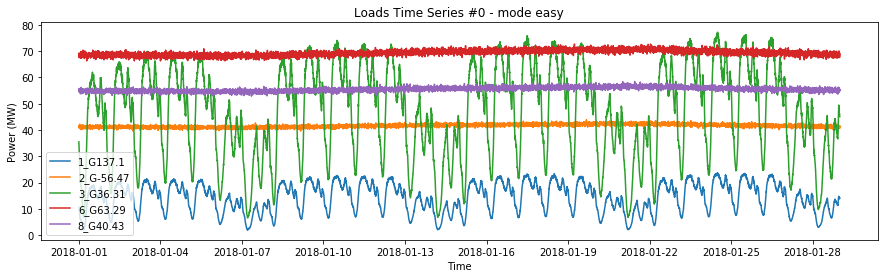

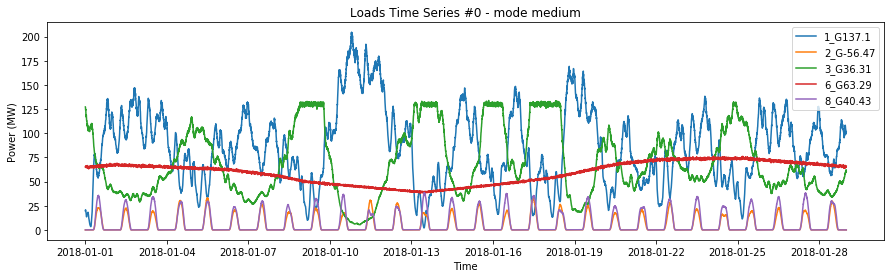

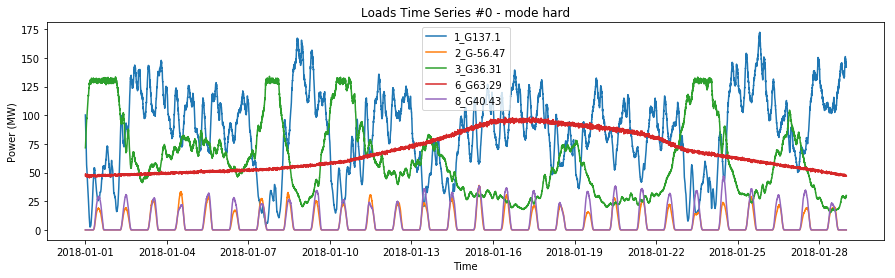

In [4]:
for mode in ['easy', 'medium', 'hard']:
    plt.figure(figsize=[15,4])
    plt.title('Loads Time Series #'+str(0)+' - mode '+mode)
    plt.xlabel('Time')
    plt.ylabel('Power (MW)')
    plt.plot(df_prods_p[mode+str(0)])
    plt.legend(list(df_prods_p[mode+str(0)]))
    plt.show()

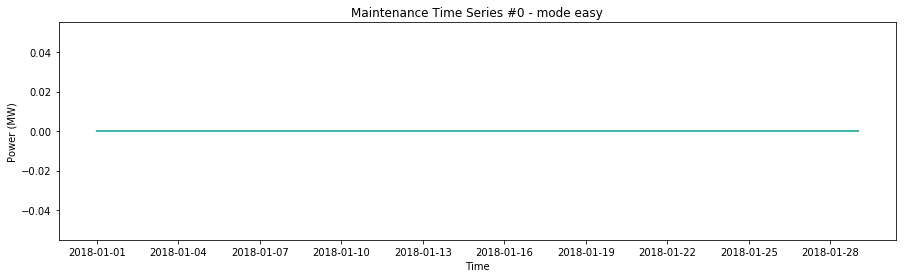

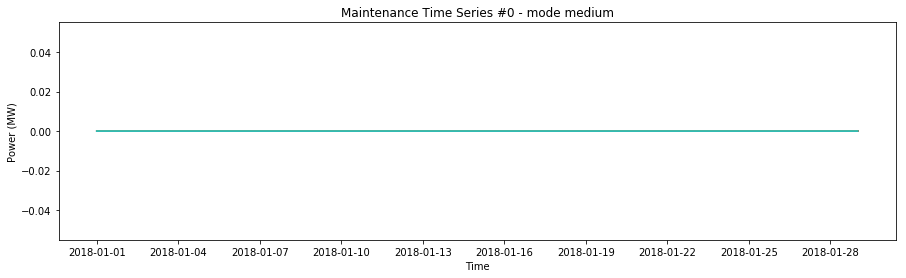

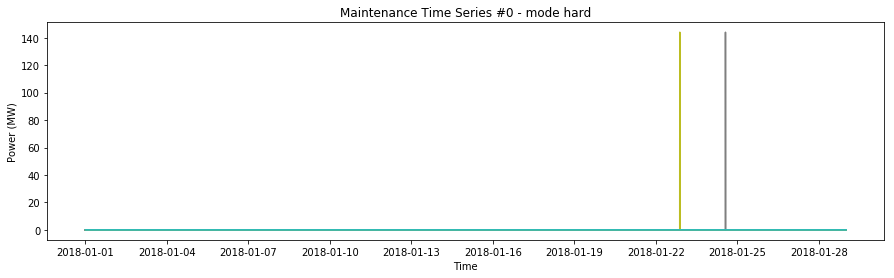

In [5]:
for mode in ['easy', 'medium', 'hard']:
    plt.figure(figsize=[15,4])
    plt.title('Maintenance Time Series #'+str(0)+' - mode '+mode)
    plt.xlabel('Time')
    plt.ylabel('Power (MW)')
    plt.plot(df_maintenance[mode+str(0)])
    plt.show()

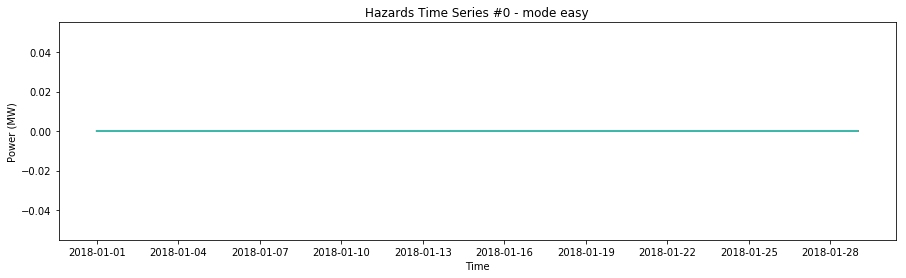

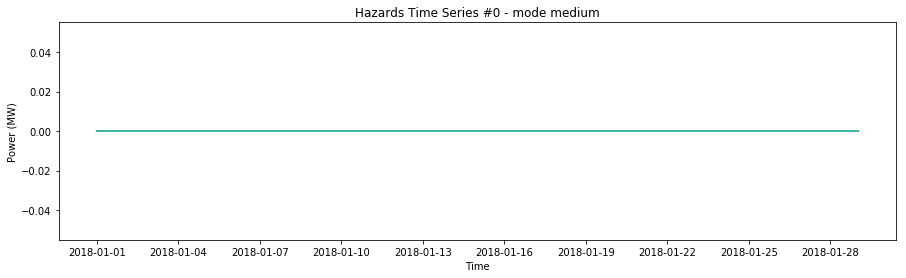

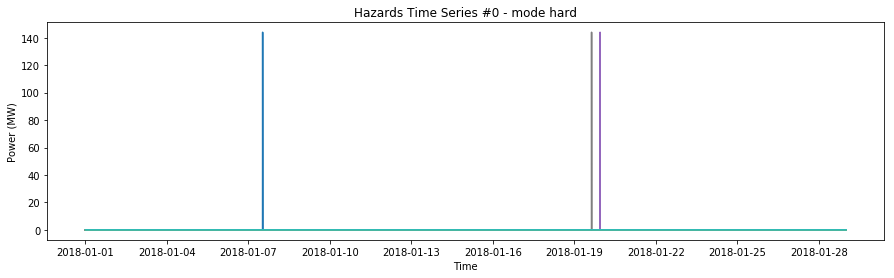

In [6]:
for mode in ['easy', 'medium', 'hard']:
    plt.figure(figsize=[15,4])
    plt.title('Hazards Time Series #'+str(0)+' - mode '+mode)
    plt.xlabel('Time')
    plt.ylabel('Power (MW)')
    plt.plot(df_hazards[mode+str(0)])
    plt.show()

In [7]:
df_flows = {}
for mode in ['easy', 'medium', 'hard']:
    df = pd.read_csv('/home/kai/Documents/Install/pypownet/pypownet/saved_flows/all/hard_coefficient_1_5/saved_flows_'+mode+'.csv')
    df.columns = [u for u in list(range(len(df.columns)))]
    df_flows[mode] = df

In [8]:
for line in list(df_flows['easy']):
    print(type(line))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [9]:
imaps = pd.read_csv('/home/kai/Documents/Install/pypownet/pypownet/parameters/default14/easy/chronics/0/_N_imaps.csv', sep=';')
imaps

,1_2_1,1_5_2,2_3_3,2_4_4,2_5_5,3_4_6,4_5_7,4_7_8,4_9_9,5_6_10,6_11_11,6_12_12,6_13_13,7_8_14,7_9_15,9_10_16,9_14_17,10_11_18,12_13_19,13_14_20
0,80,30,30,40,30,60,30,30,10,30,40,20,20,35,35,30,25,25,20,20


In [10]:
print(imaps.iloc[:, 2])
y=imaps.iloc[:, line][0]
print(type(line))
print(y)


0    30
Name: 2_3_3, dtype: int64
<class 'int'>
20


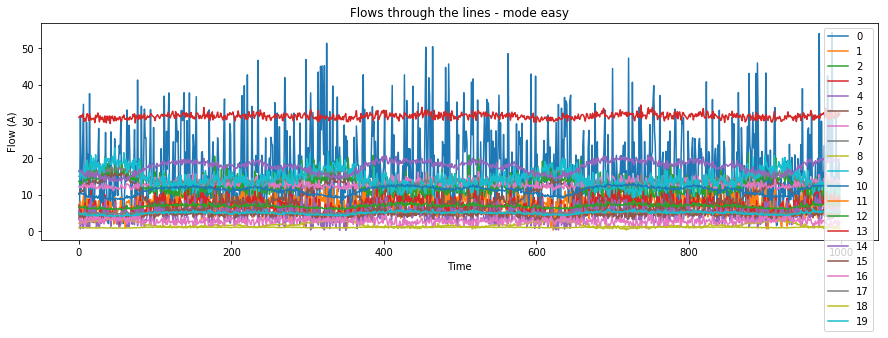

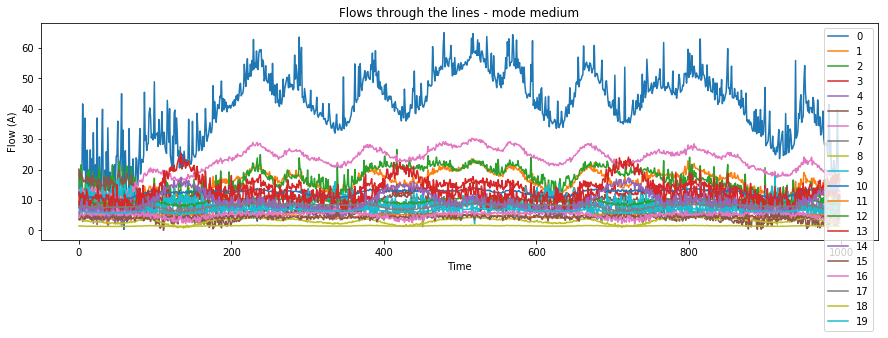

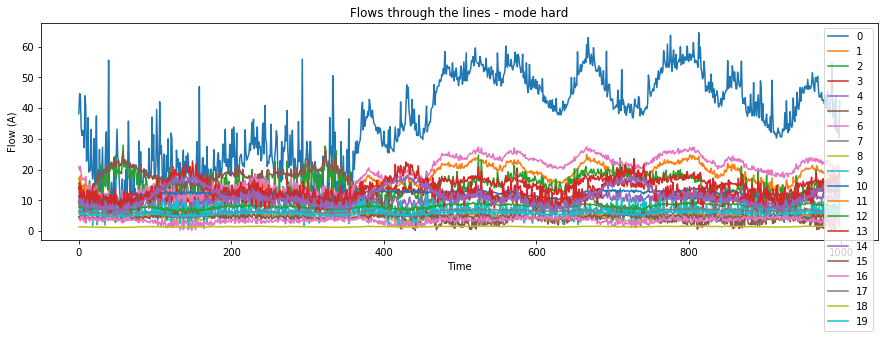

In [11]:
for mode in ['easy', 'medium', 'hard']:
    df_flows[mode].plot(figsize=[15,4])
    plt.title('Flows through the lines - mode '+mode)
    plt.xlabel('Time')
    plt.ylabel('Flow (A)')
    plt.show()

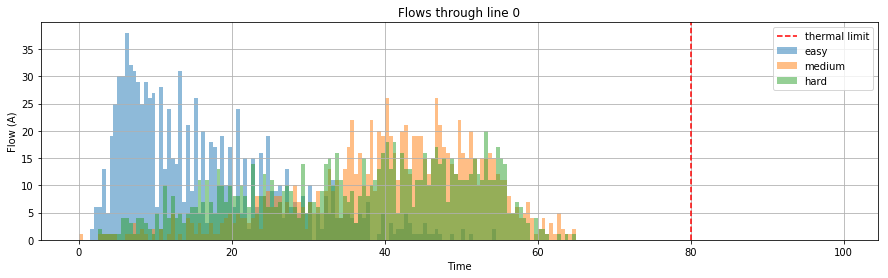

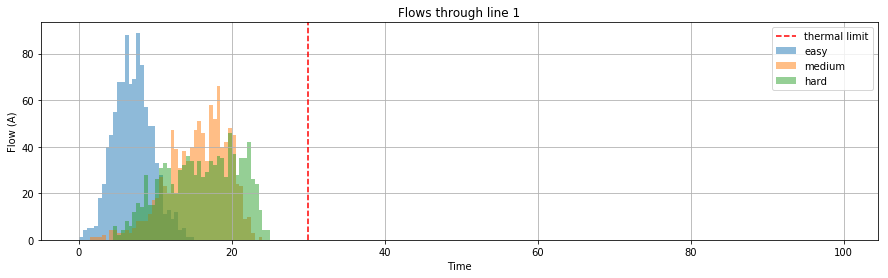

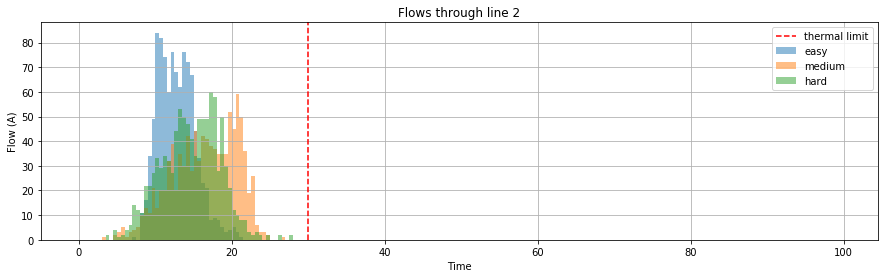

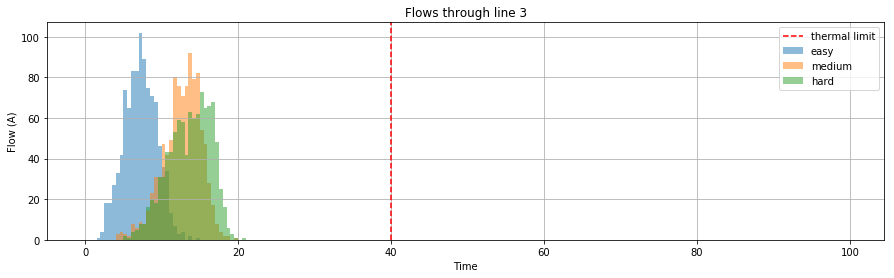

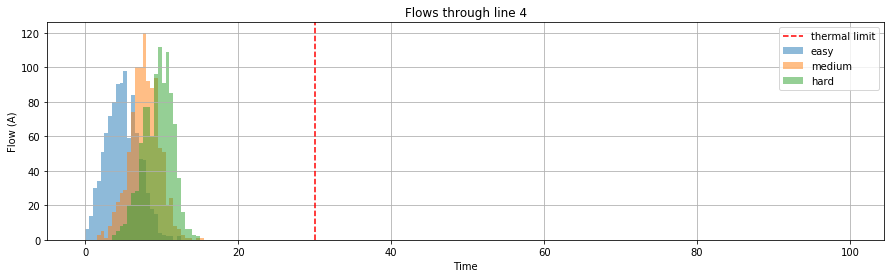

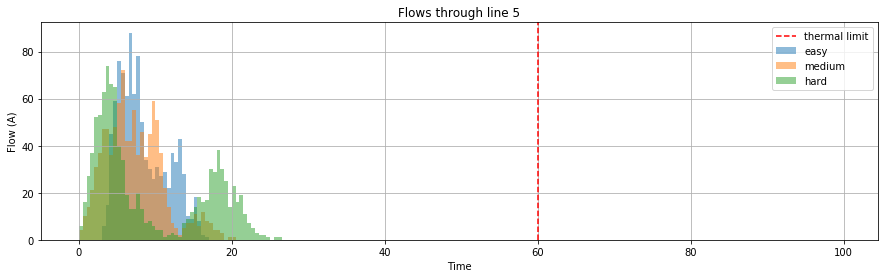

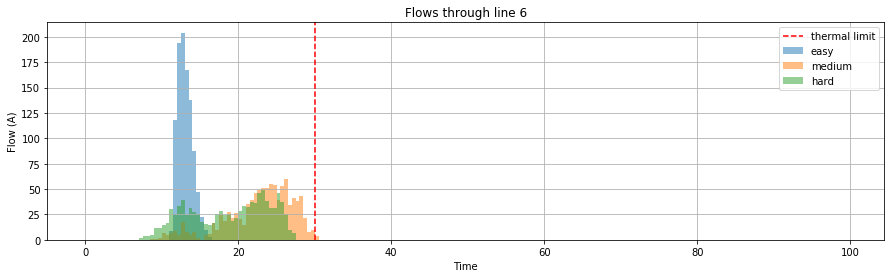

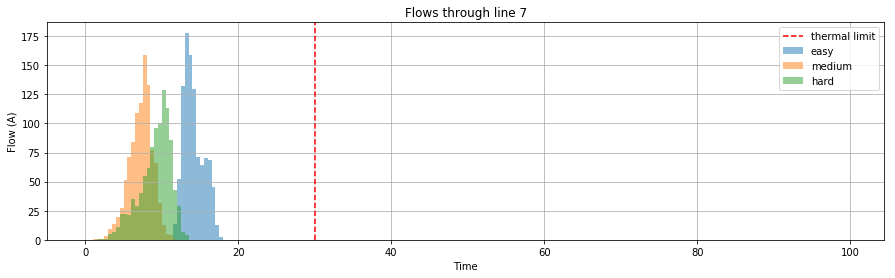

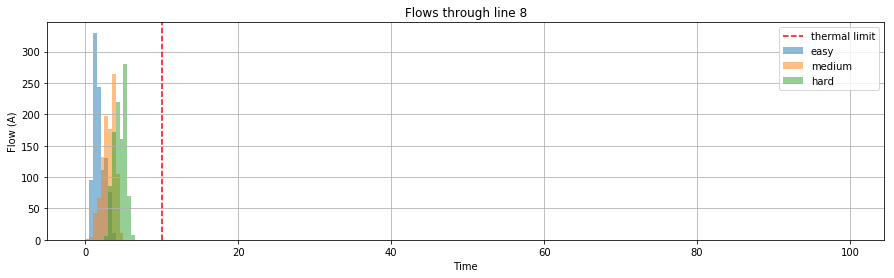

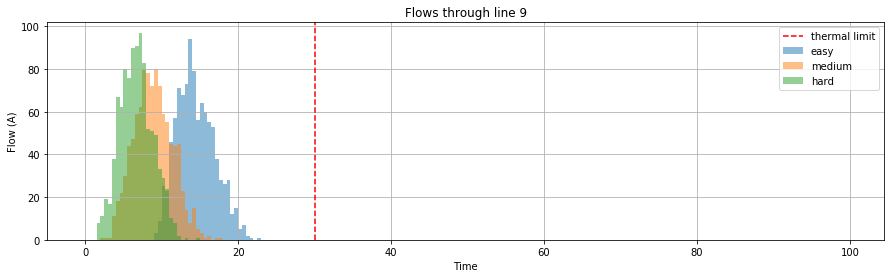

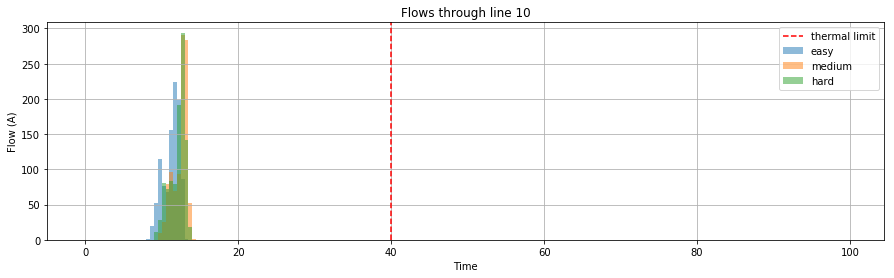

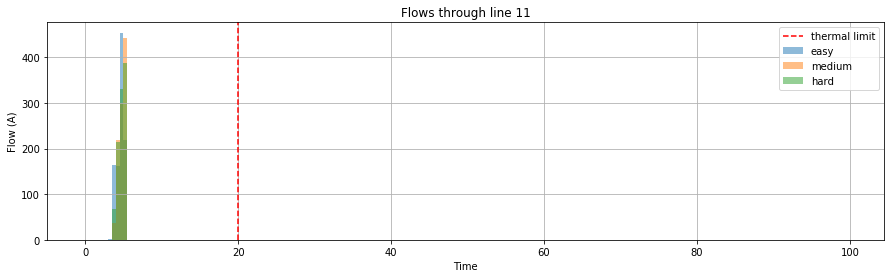

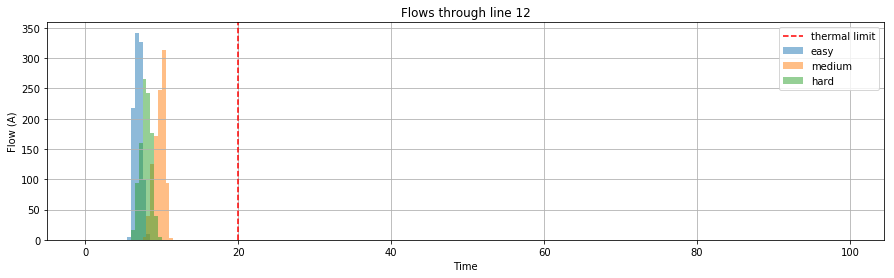

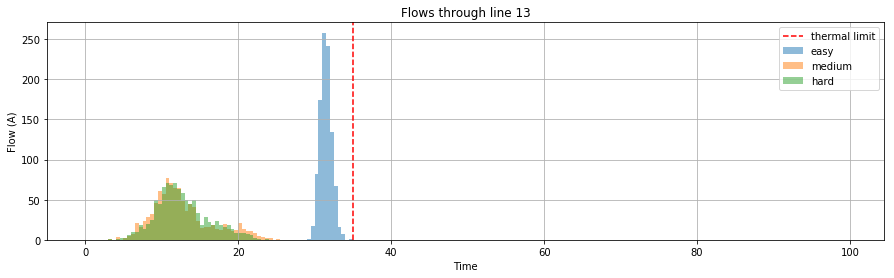

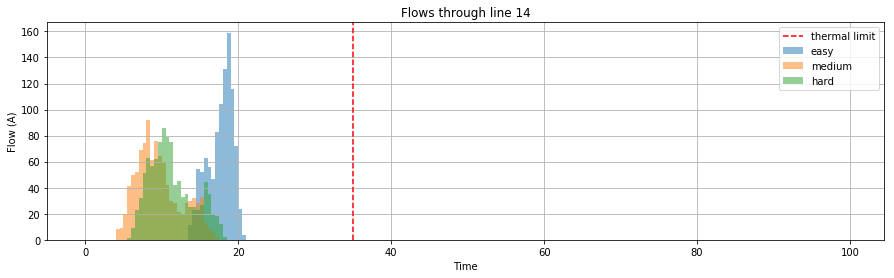

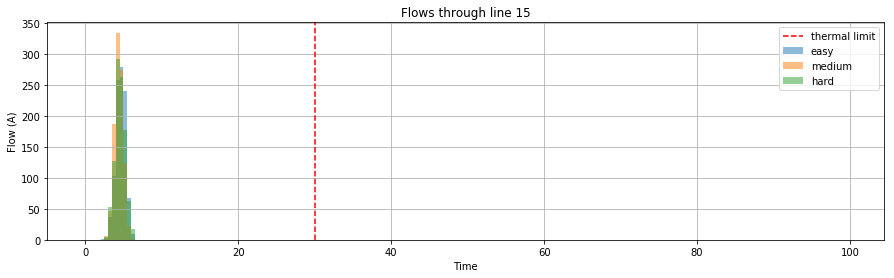

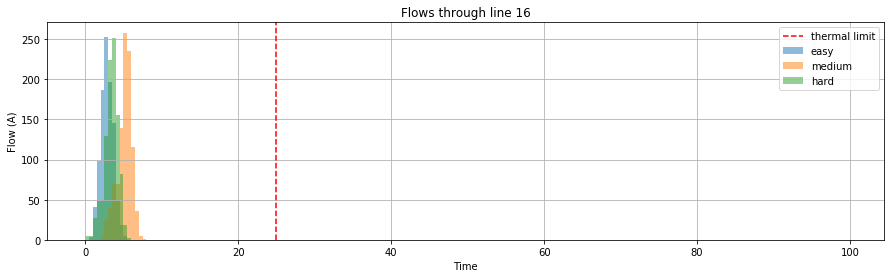

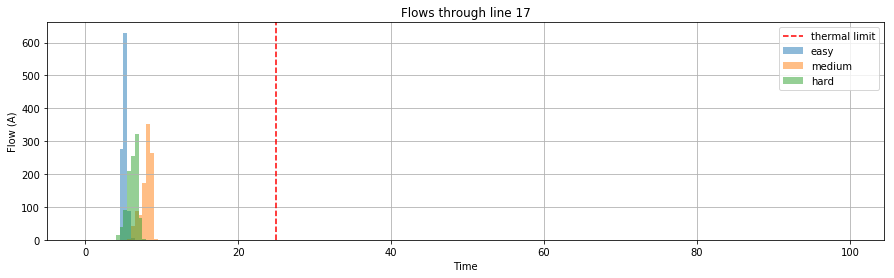

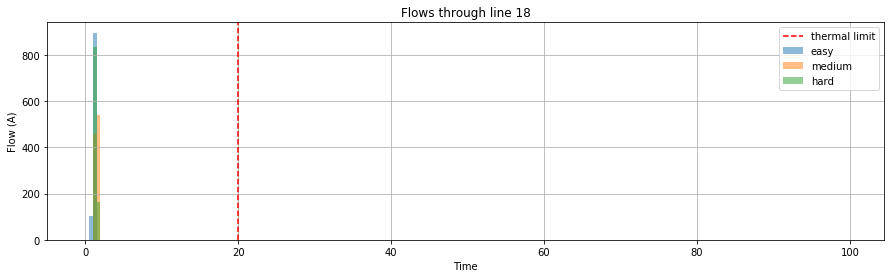

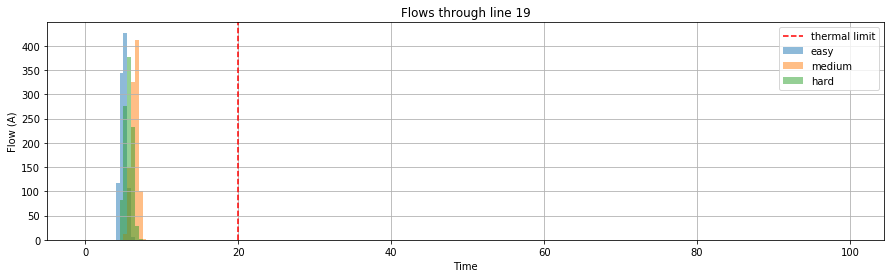

In [12]:
for line in list(df_flows['easy']):
    for mode in ['easy', 'medium', 'hard']:
        df_flows[mode][line].hist(figsize=[15,4], bins=[i*0.5 for i in range(200)], alpha=0.5)
    plt.title('Flows through line '+str(line))
    plt.axvline(x=imaps.iloc[:, line][0], color='r', linestyle='--')
    plt.legend(['thermal limit', 'easy', 'medium', 'hard'])
    plt.xlabel('Time')
    plt.ylabel('Flow (A)')
    plt.show()

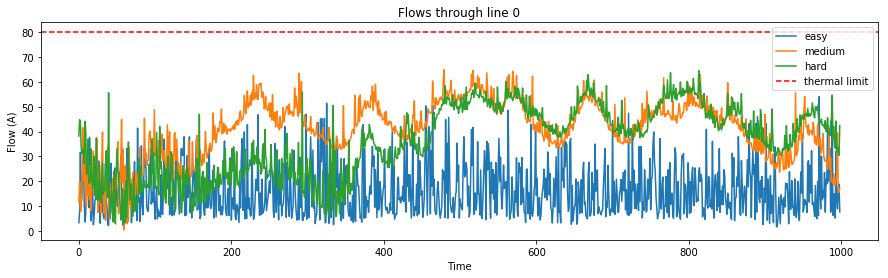

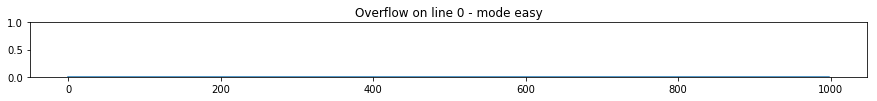

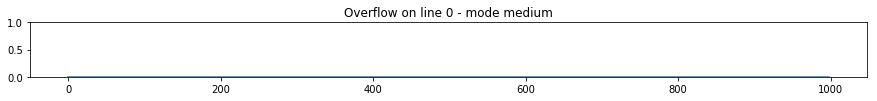

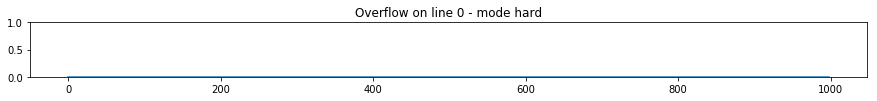

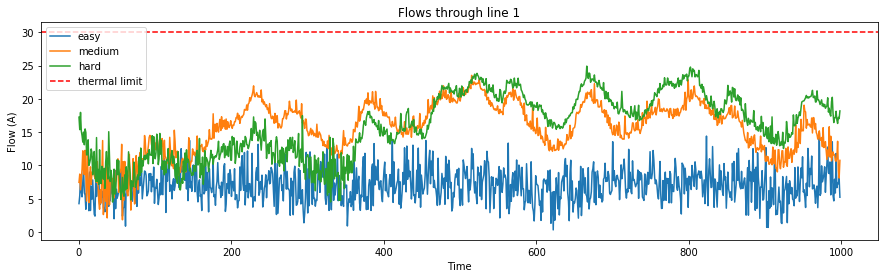

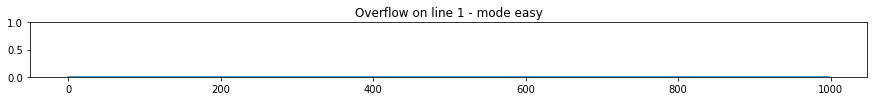

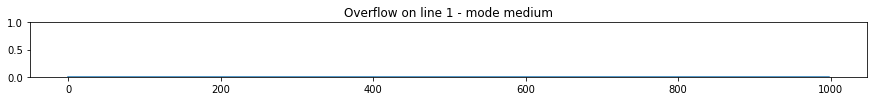

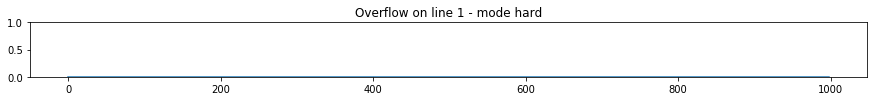

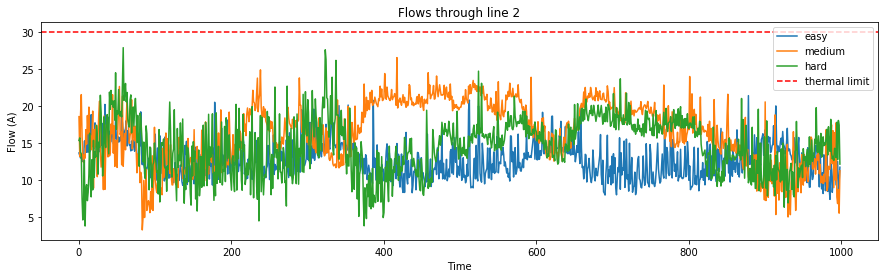

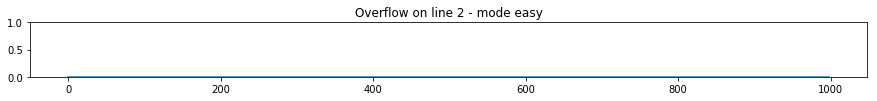

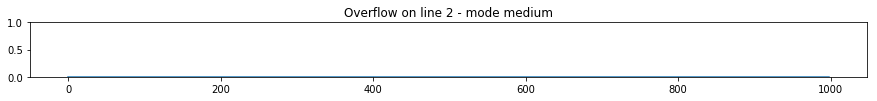

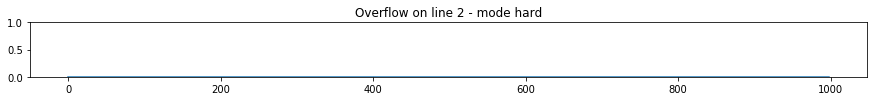

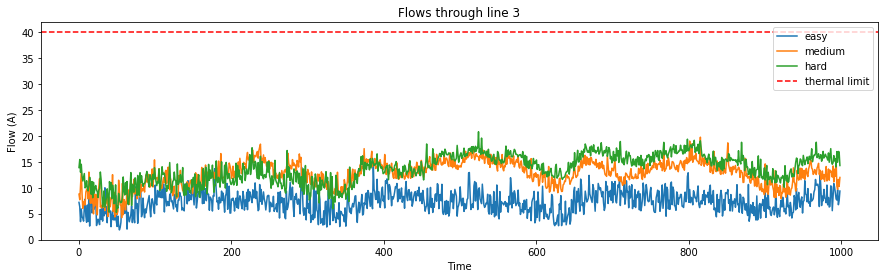

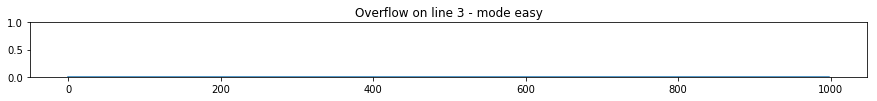

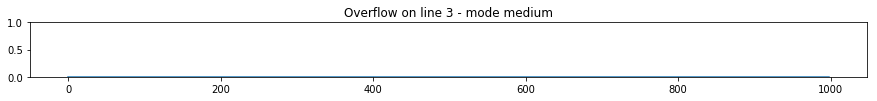

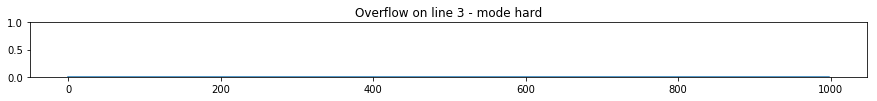

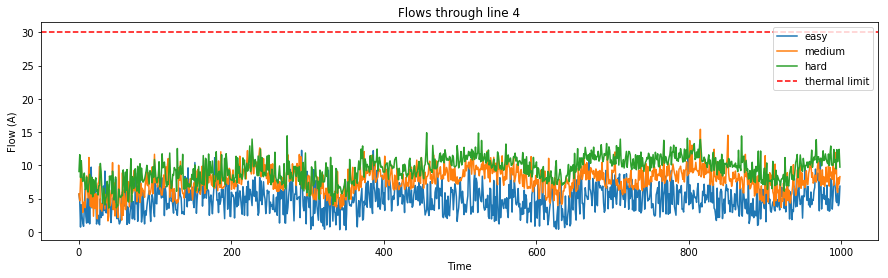

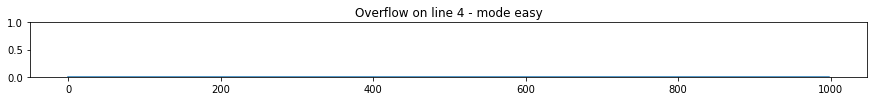

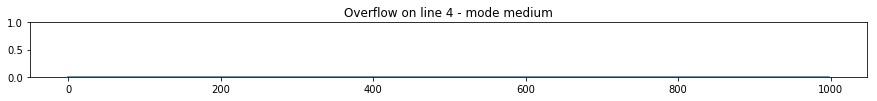

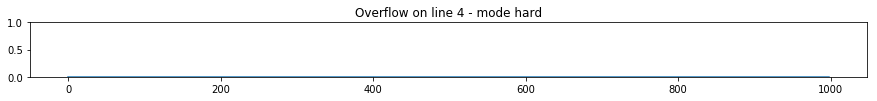

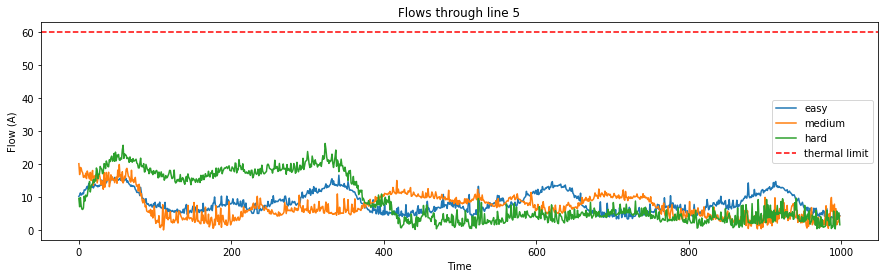

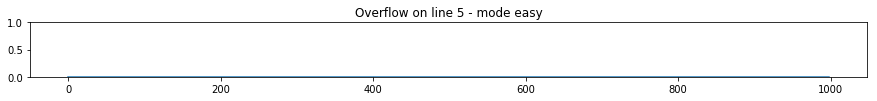

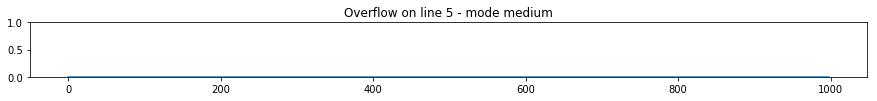

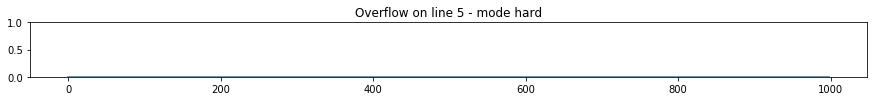

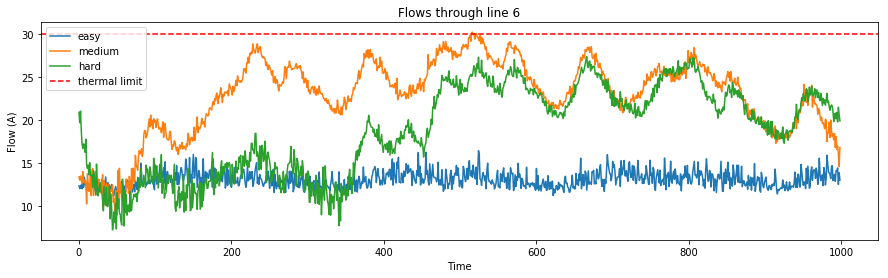

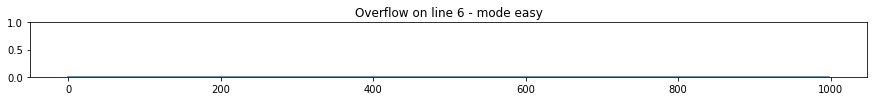

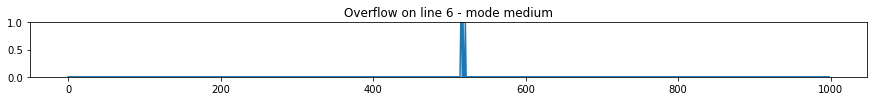

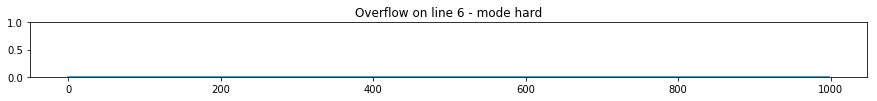

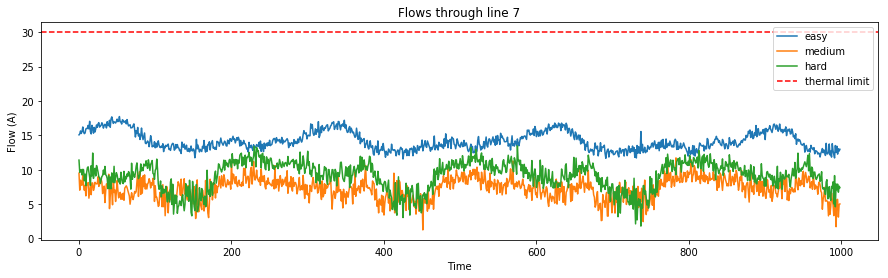

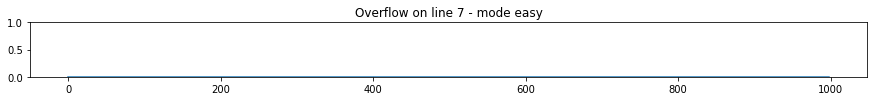

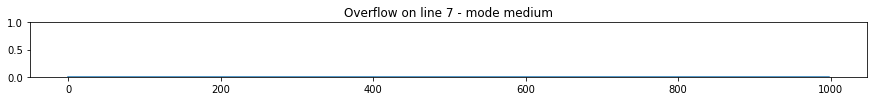

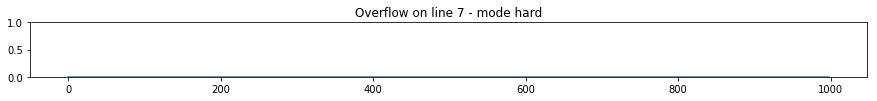

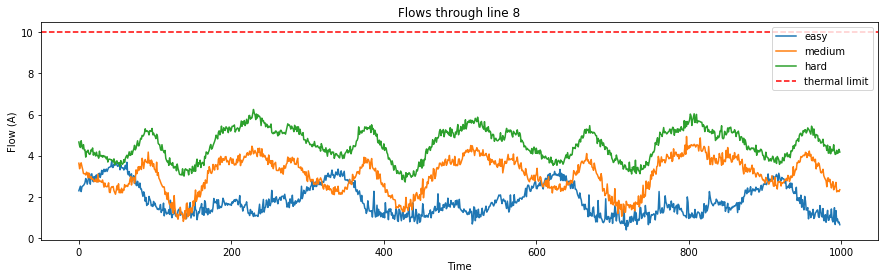

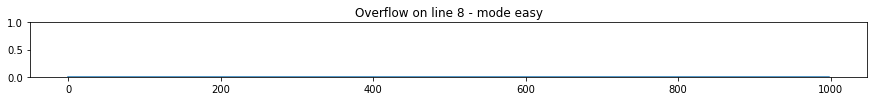

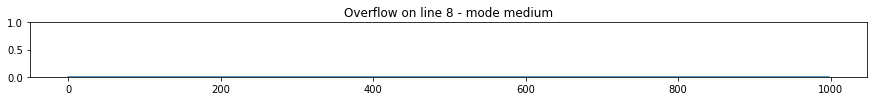

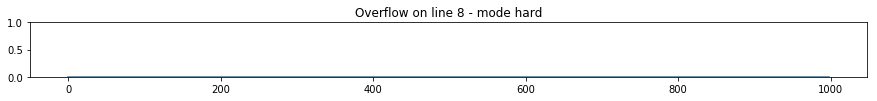

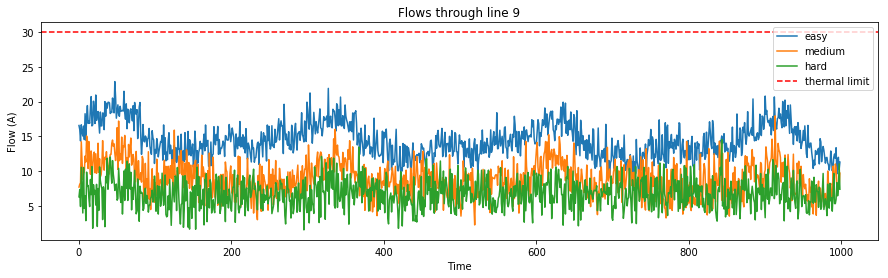

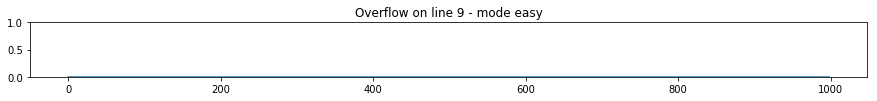

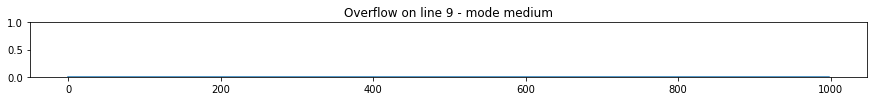

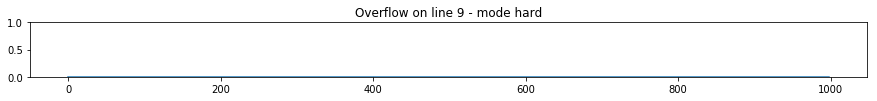

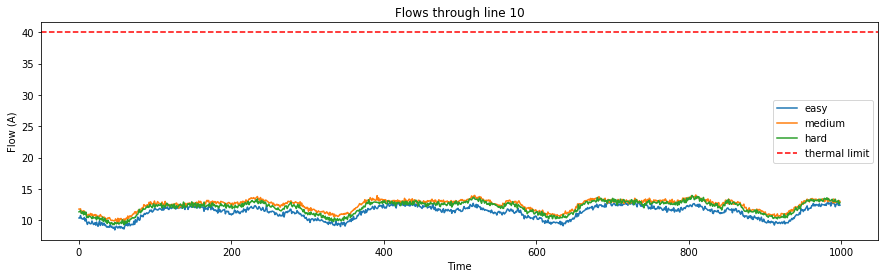

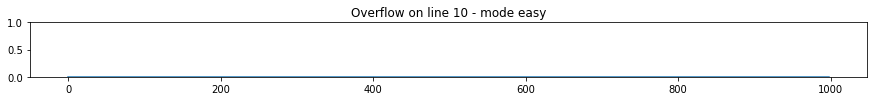

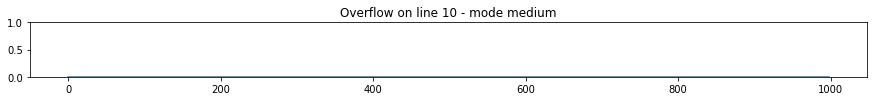

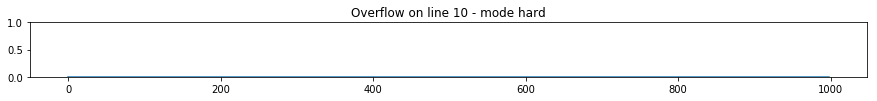

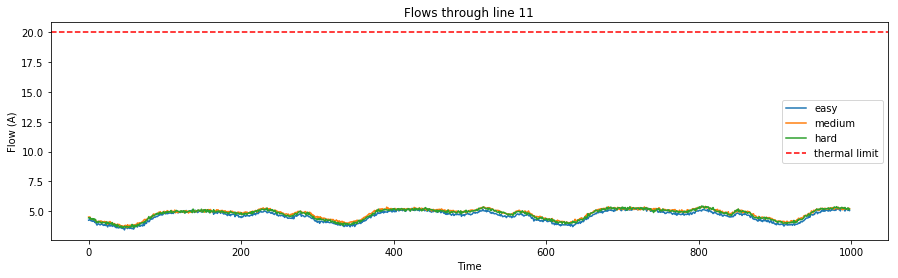

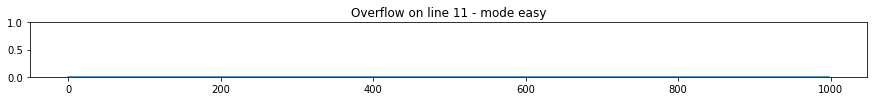

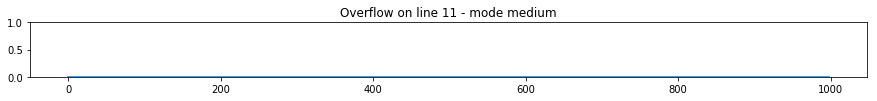

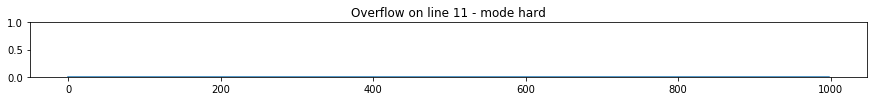

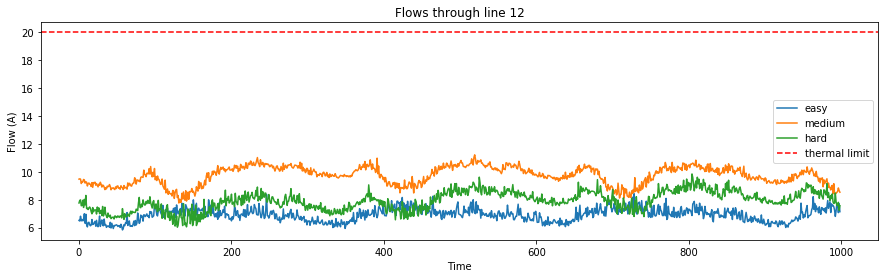

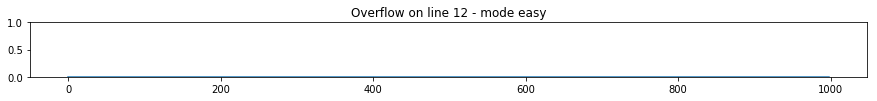

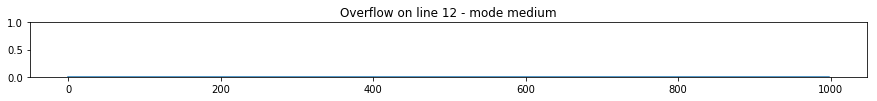

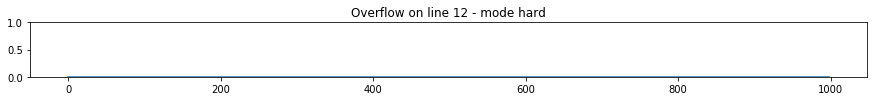

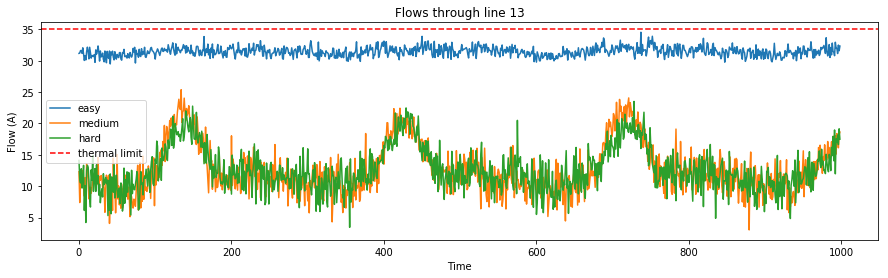

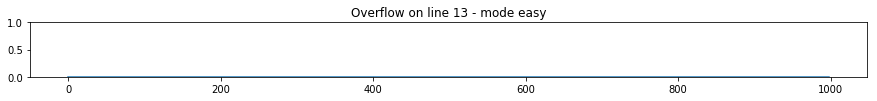

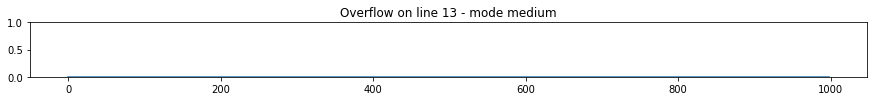

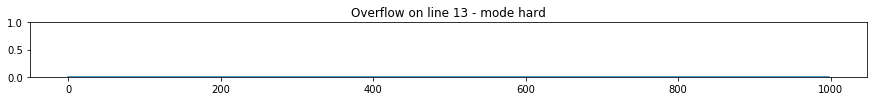

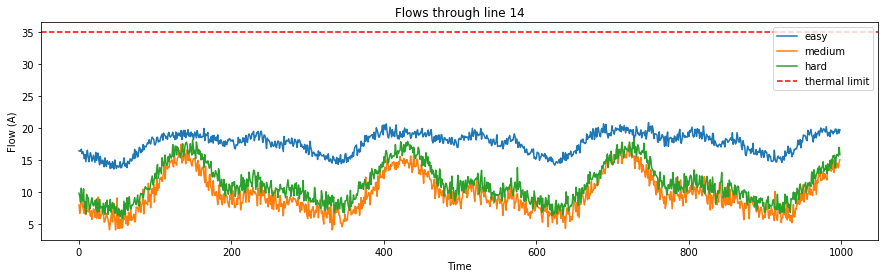

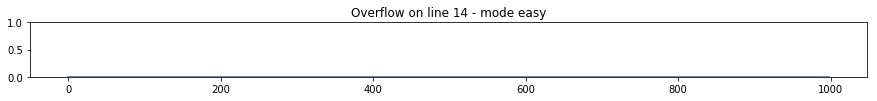

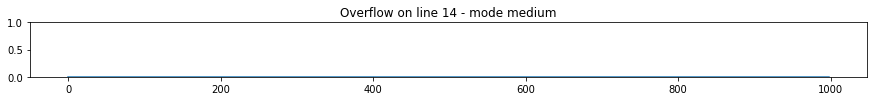

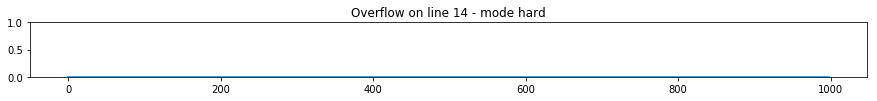

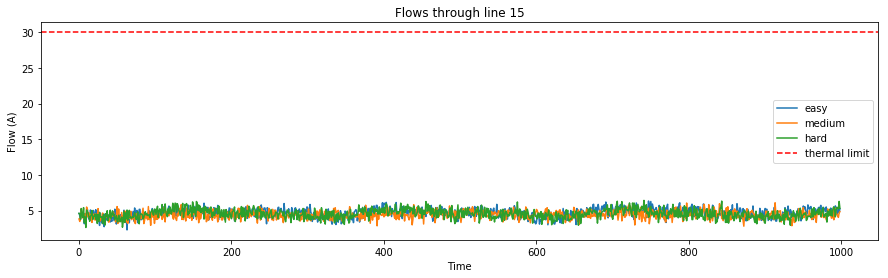

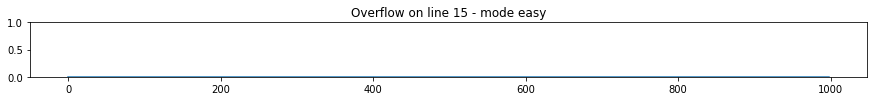

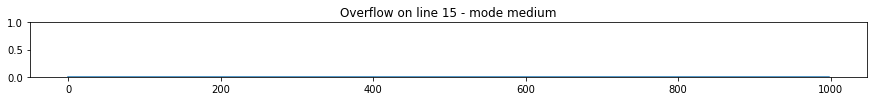

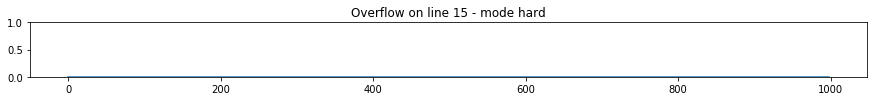

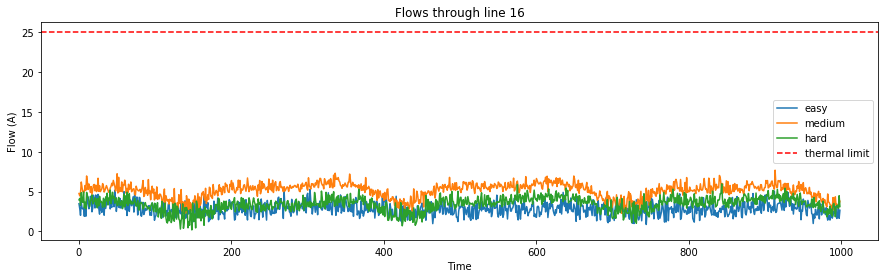

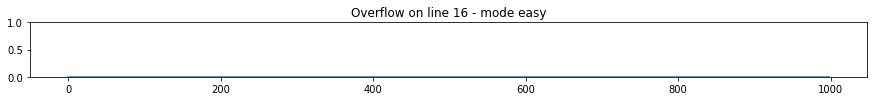

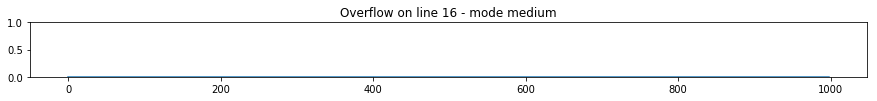

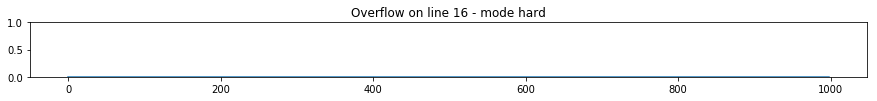

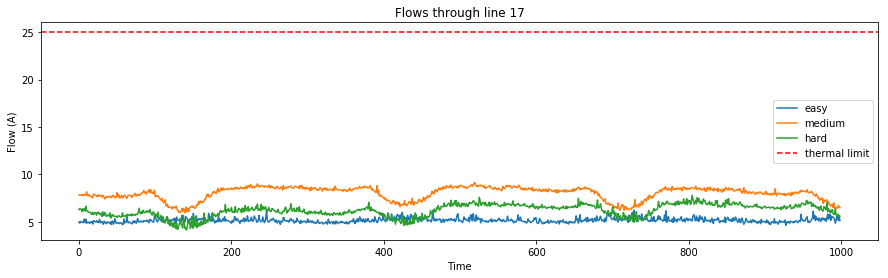

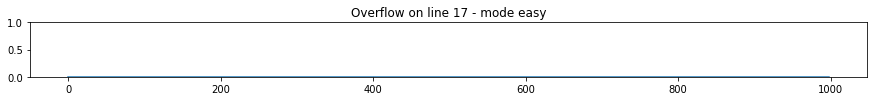

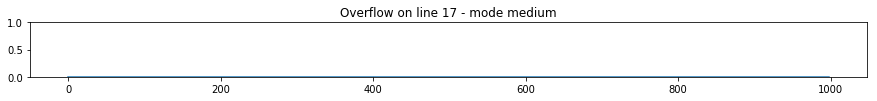

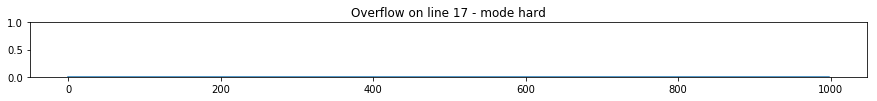

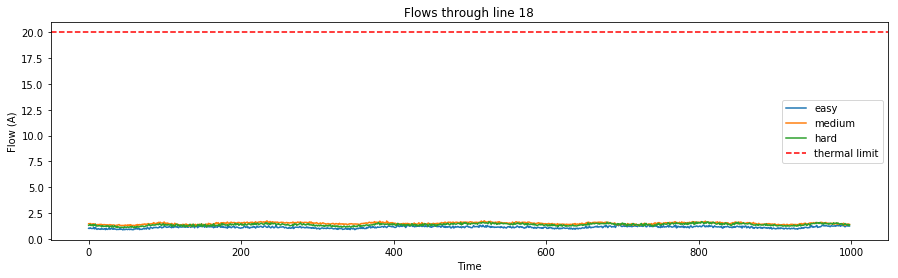

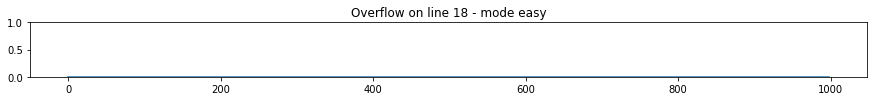

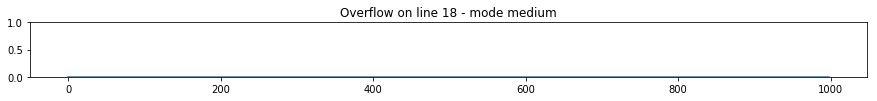

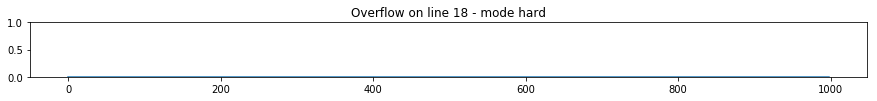

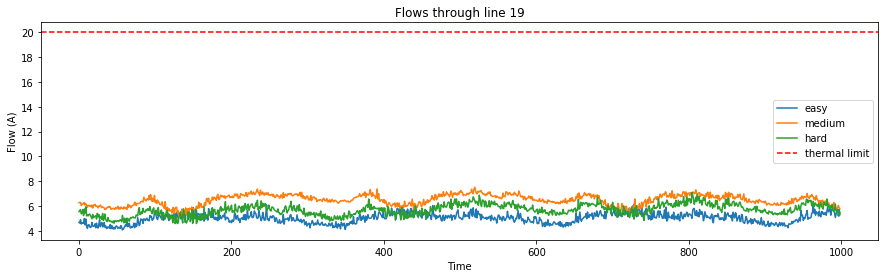

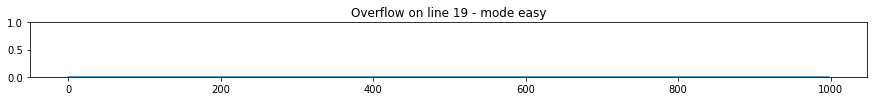

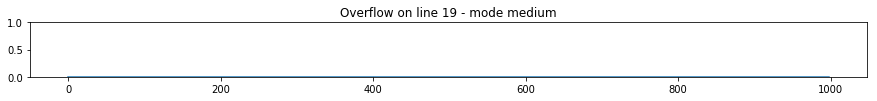

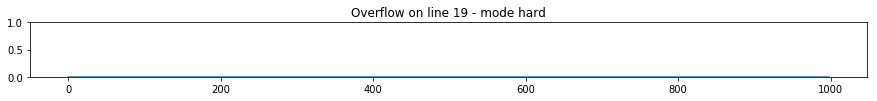

{'easy': 0, 'medium': 4, 'hard': 0}


In [13]:
score = {}
score['easy'] = 0
score['medium'] = 0
score['hard'] = 0
for line in list(df_flows['easy']):
    for mode in ['easy', 'medium', 'hard']:
        df_flows[mode][line].plot(figsize=[15,4])
    plt.title('Flows through line '+str(line))
    plt.axhline(y=imaps.iloc[:, line][0], color='r', linestyle='--')
    plt.legend(['easy', 'medium', 'hard', 'thermal limit'])
    plt.xlabel('Time')
    plt.ylabel('Flow (A)')
    plt.show()
    for mode in ['easy', 'medium', 'hard']:
        plt.figure(figsize=[15,1])
        plt.plot((df_flows[mode][line]>imaps.iloc[:, line][0])*1)
        plt.title('Overflow on line '+str(line)+' - mode '+mode)
        plt.ylim([0,1])
        plt.show()
        score[mode] += np.sum((df_flows[mode][line]>imaps.iloc[:, line][0])*1)
print(score)

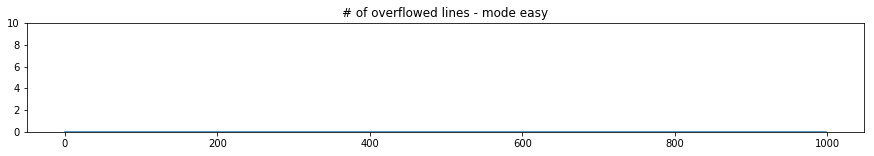

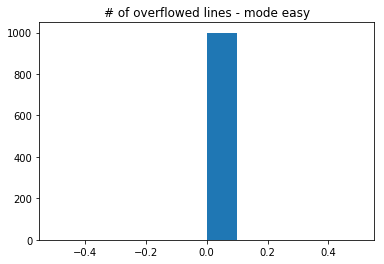

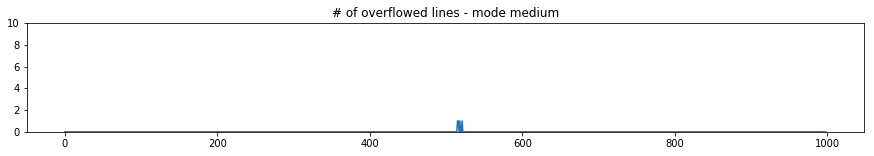

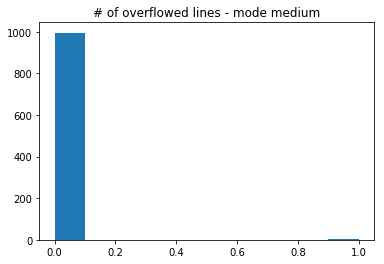

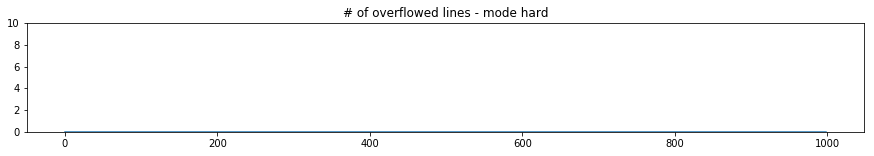

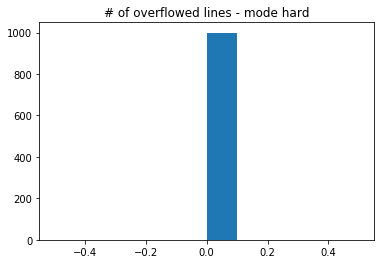

In [14]:
for mode in ['easy', 'medium', 'hard']:
    series = 0*(df_flows[mode][0])
    for line in list(df_flows[mode]):
        series += (df_flows[mode][line]>imaps.iloc[:, line][0])*1
    plt.figure(figsize=[15,2])
    plt.plot(series)
    plt.ylim([0,10])
    plt.title('# of overflowed lines - mode '+mode)
    plt.show()
    plt.hist(series)
    plt.title('# of overflowed lines - mode '+mode)
    plt.show()